/tmp/ipykernel_721/299561716.py:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  police_stations = ox.geometries.geometries_from_place('Los Angeles, CA, USA', tags={'amenity':'police'})
/opt/conda/lib/python3.11/site-packages/osmnx/features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
/tmp/ipykernel_721/299561716.py:23: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. 

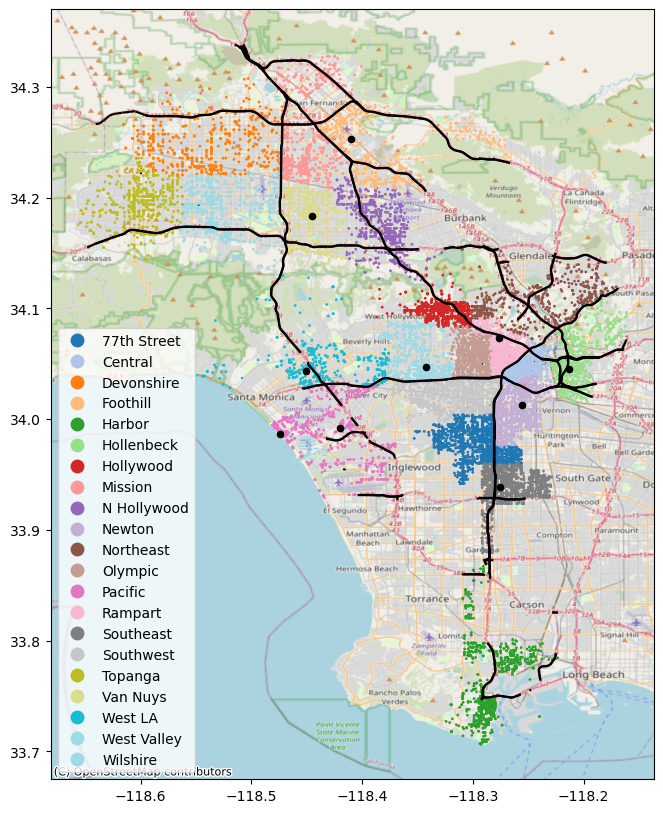

In [8]:
import networkx as nx # need networkx >= 2.5
import osmnx as ox #street map networks?
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.ops import nearest_points
import pandas as pd

la_crime_2023 = pd.read_csv('crime_23_filtered.csv')
la_crime_2023['LAT'] = la_crime_2023['LAT'].astype(float)
la_crime_2023['LON'] = la_crime_2023['LON'].astype(float)
la_crime_2023 = la_crime_2023[(la_crime_2023['LAT'] != 0) | (la_crime_2023['LON'] != 0)]
la_crime_2023 = la_crime_2023[la_crime_2023['Crm Cd Desc'].str.contains('WEAPON')]
la_crime_2023_gdf = gpd.GeoDataFrame(la_crime_2023, geometry=gpd.points_from_xy(la_crime_2023['LON'],la_crime_2023['LAT']))
la_crime_2023_gdf.crs = 'epsg:4326'
la_crime_2023_gdf = la_crime_2023_gdf.to_crs('epsg:4326')
#using osm (open street map)
police_stations = ox.geometries.geometries_from_place('Los Angeles, CA, USA', tags={'amenity':'police'})
highways = ox.geometries.geometries_from_place('Los Angeles, CA, USA',tags={'highway': 'motorway'})
fig, ax = plt.subplots(1,1, figsize=[10,10])
la_crime_2023_gdf.plot(ax= ax, figsize=(10, 10), markersize=1, cmap = 'tab20', column = 'AREA NAME', legend = True)
police_stations.plot(ax = ax, markersize=20, color = 'black',label='Police/Sheriff Stations')
highways.plot(ax=ax,color='black',label='Highways')
ctx.add_basemap(ax, crs=la_crime_2023_gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
ax.title("Weapon Related Crimes within LA")

/opt/conda/lib/python3.11/site-packages/osmnx/features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
/opt/conda/lib/python3.11/site-packages/osmnx/features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
/tmp/ipykernel_721/3297590909.py:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


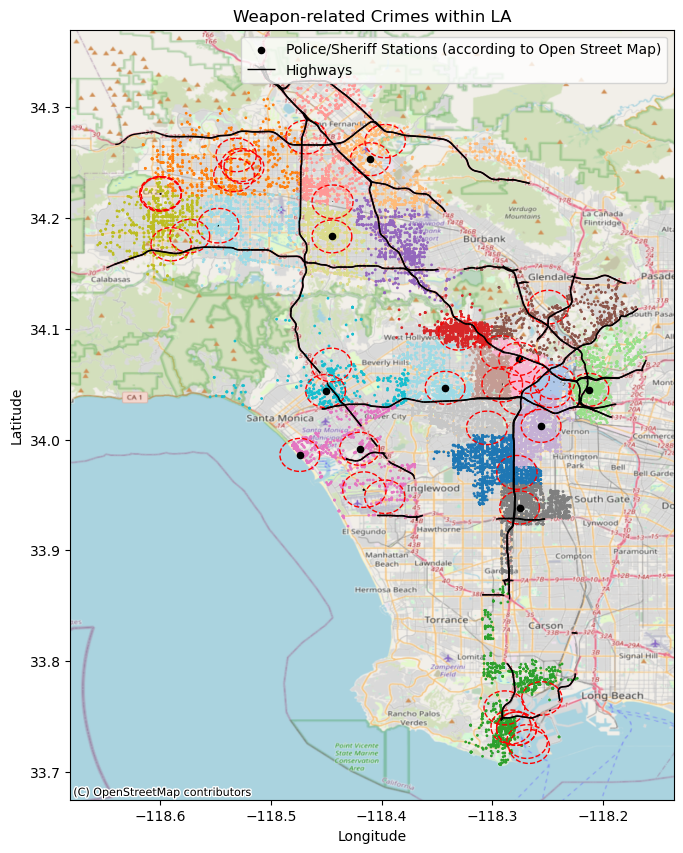

In [13]:
import networkx as nx  # need networkx >= 2.5
import osmnx as ox  # street map networks
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.ops import nearest_points
import pandas as pd

# crime data 
la_crime_2023 = pd.read_csv('crime_23_filtered.csv')
la_crime_2023['LAT'] = la_crime_2023['LAT'].astype(float)
la_crime_2023['LON'] = la_crime_2023['LON'].astype(float)
la_crime_2023 = la_crime_2023[(la_crime_2023['LAT'] != 0) | (la_crime_2023['LON'] != 0)]
la_crime_2023 = la_crime_2023[la_crime_2023['Crm Cd Desc'].str.contains('WEAPON')]
la_crime_2023_gdf = gpd.GeoDataFrame(la_crime_2023, geometry=gpd.points_from_xy(la_crime_2023['LON'], la_crime_2023['LAT']))
la_crime_2023_gdf.crs = 'epsg:4326'
la_crime_2023_gdf = la_crime_2023_gdf.to_crs('epsg:4326')

# using OpenStreetMap to get police stations
police_stations = ox.features_from_place('Los Angeles, CA, USA', tags={'amenity': 'police'})

# buffer around each police station (2000m)
police_stations_buffer = police_stations.to_crs(epsg=3857).buffer(2000).to_crs(epsg=4326)

# using OpenStreetMap to get highways
highways = ox.features_from_place('Los Angeles, CA, USA', tags={'highway': 'motorway'})

# plotting
fig, ax = plt.subplots(1, 1, figsize=[10, 10])

# plot crime data
la_crime_2023_gdf.plot(ax=ax, markersize=1, cmap='tab20', column='AREA NAME', legend=True)

# plot police stations
police_stations.plot(ax=ax, markersize=20, color='black', label='Police/Sheriff Stations (according to Open Street Map)')

# plot buffers around police stations
gpd.GeoSeries(police_stations_buffer).plot(ax=ax, color='none', edgecolor='red', linewidth=1, linestyle='--', label='1000m Radius')

# plot highways
highways.plot(ax=ax, color='black', linewidth=1, label='Highways')

# add basemap
ctx.add_basemap(ax, crs=la_crime_2023_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# making it make sense
plt.title('Weapon-related Crimes within LA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()
